# Lab Assignment Four: Evaluation and Multi-Layer Perceptron
By:
- <b>Saeed Mohammadi</b> SMU ID# <b>47509206</b>
- <b>Niraj Verma</b> SMU ID# <b>47510753</b>
- <b>Michael Xu</b> SMU ID# <b>40303111</b>
- <b>Mohamed Elsaied</b> SMU ID# <b>47288466</b>
<br> Fall 2018
<br> Machine Learning In Python

# 1.Buisness Understanding
 Traveling by flights have been a common type of transportation; however, delays has been one of the most concerned problems with passengers. Our nearest airport, Dallas-Fort Worth (DFW) International Airport, is the second largest airport in the U.S. both by size of the land and the airline hub, and it is the fourth busiest U.S. airport based on the number of passengers enplaned in 2017. However, DFW could not make itself a pioneer at the on-time ratio. According to Statista.com, DFW was ranked No. 10 on the most punctual airport by on-time arrival, beaten by the champion, Minneapolis–Saint Paul International, approximately 4%. 
          
As citizens in the Dallas-Fort Worth metroplex and frequent flyers at DFW, we have seen the development of the metroplex, as well as the potential demand of service growth of the airport. Thus, we would like to provide prediction of the flight delay given certain features to help improving the punctuality of arrivals at the DFW airport. We believe our analytics will favor American Airlines who headquarters and owns its largest hub at DFW airport, so they are able to provide more punctual services to its passengers in a more targeted manner, and to embrace more potential travellers to fly. Additionally, our predictions could earn more recognition for the American Airlines (AA) official site, by attracting more users to book tickets directly through AA, instead from other third-party agencies.
    
## 1.1 The Data Set
The dataset came from the U.S. Department of Transportation’s (DOT) Bureau of Transportation Statistics, which tracks the on-time performance of domestic flights operated by large air carriers. The retrieved dataset contains only the domestic flight information which arrived at the DFW airport, including delays and cancellations. There are 181,208 observations and 38 features, such as the time of flight, airline code, and arrival cities, etc. We have a combination of nominal (qualitative) and ratio (quantitative) features. 
    
## 1.2 Measure Of Success

Our predictions can be an alternative to the on-time rate provided by American Airlines official site, which is based on their historical data and the average of on-time rate. Our predictions aim to predict whether a flight will be delayed, arrived on time, or arrived early. Since a flight delay is considered as a flight arriving at the gate over 15 minutes after the scheduled time of arrival, we will respect this industry practice and to apply such standard to our predictions. The goal of the predictions is to achieve a 95% rate of success in test data set.
          
## 1.3 Business Motivation
Our overall blueprint as the data science team in AA is using 2017 DFW flight info to predict these flights performance in 2018 (similarly for future). We hope based on our results, we can predict the flights performance in 2018. Our result can be used for AA's pricing analyst team to determine which tickets need to be discounted (those predicted delay flight) so that AA could earn more loyal customer and potential higher profit or give the results to the marketing team to run a campaign in case the flight is delayed, the customer will be rembursed.



### References:
<ol><li>Course github page including slides and demos: https://github.com/eclarson/MachineLearningNotebooks</li>
    <li>Course Canvas page: https://smu.instructure.com/courses/49399</li>
    <li>Source of data: scintific data 130K molecules https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4322582/</li>
    <li>DOT: https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236&DB_Short_Name=On-Time</li>
    <li>https://www.statista.com/statistics/185679/passengers-boarded-at-the-leading-25-us-airports/</li>
    <li>https://www.statista.com/statistics/806848/punctuality-of-major-airports-united-states/</li>
    <li>Machine Learning In Python</li>
    <li>Elements Of Statistical Learning</li>
    <li>Introduction To Statistical Learning</li>
    <li>Neural Network Design</li>
    
</ol>


# 2. Data Understanding

## 2.1 Data and python module loading

Loading the necessary python modules and the dataset.

In [1]:
# Load the flight dataset and useful python module
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import missingno as mn
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('flights2017.csv') 

# Show the name of each column 
df.head()

# Based info about each column type (object, integer, or float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984923 entries, 0 to 984922
Data columns (total 38 columns):
Unnamed: 0             984923 non-null int64
QUARTER                984923 non-null int64
MONTH                  984923 non-null int64
DAY_OF_MONTH           984923 non-null int64
DAY_OF_WEEK            984923 non-null int64
FL_DATE                984923 non-null object
UNIQUE_CARRIER         984923 non-null object
AIRLINE_ID             984923 non-null int64
TAIL_NUM               979808 non-null object
FL_NUM                 984923 non-null int64
ORIGIN_AIRPORT_ID      984923 non-null int64
ORIGIN_CITY_NAME       984923 non-null object
ORIGIN_STATE_NM        984923 non-null object
DEST_AIRPORT_ID        984923 non-null int64
DEST_CITY_NAME         984923 non-null object
DEST_STATE_NM          984923 non-null object
CRS_DEP_TIME           984923 non-null int64
DEP_TIME               968944 non-null float64
DEP_DELAY              968937 non-null float64
DEP_DELAY_NEW          

## 2.2 Data Cleaning

Since we are only interested in incoming flights to DFW airport, we subset the data where DEST_CITY_NAME is DFW.

In [2]:
# Subset flights which has Dallas as their final destination
df_dfw = df[df['DEST_CITY_NAME']=='Dallas/Fort Worth, TX']

# Convert flight date to a date variable
df_dfw['FL_DATE'] = pd.to_datetime(df_dfw['FL_DATE'])

#The general info for the cleared dataset
print('Fights Data Dimensions:', df.shape)
print(df_dfw.info())

Fights Data Dimensions: (984923, 38)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 181208 entries, 1 to 984915
Data columns (total 38 columns):
Unnamed: 0             181208 non-null int64
QUARTER                181208 non-null int64
MONTH                  181208 non-null int64
DAY_OF_MONTH           181208 non-null int64
DAY_OF_WEEK            181208 non-null int64
FL_DATE                181208 non-null datetime64[ns]
UNIQUE_CARRIER         181208 non-null object
AIRLINE_ID             181208 non-null int64
TAIL_NUM               181032 non-null object
FL_NUM                 181208 non-null int64
ORIGIN_AIRPORT_ID      181208 non-null int64
ORIGIN_CITY_NAME       181208 non-null object
ORIGIN_STATE_NM        181208 non-null object
DEST_AIRPORT_ID        181208 non-null int64
DEST_CITY_NAME         181208 non-null object
DEST_STATE_NM          181208 non-null object
CRS_DEP_TIME           181208 non-null int64
DEP_TIME               179218 non-null float64
DEP_DELAY              17

## 2.3  Data Attirbute Defination

In [3]:
#Present the data description
description_table = pd.DataFrame()
description_table['Column Name'] = df_dfw.columns
description_table['Description'] = ['Label of Observation',
                                    'Quarter (1-4)', 
                                    'Month (1-12)',
                                    'Day of Month',
                                    'Day of Week',
                                    'Flight Date',
                                    'Airline 2-Letter Codes',
                                    'An identification number assigned by US DOT to identify a unique airline (carrier). A unique airline (carrier) is defined as one holding and reporting under the same DOT certificate regardless of its Code, Name, or holding company/corporation.',
                                    'Tail number of aircraft', 
                                    'Flight number', 
                                    'Origin Airport, Airport ID. An identification number assigned by US DOT to identify a unique airport. Use this field for airport analysis across a range of years because an airport can change its airport code and airport codes can be reused.', 
                                    'Origin Airport, City Name',
                                    'Origin Airport, State Name',
                                    'Destination Airport, Airport ID. An identification number assigned by US DOT to identify a unique airport. Use this field for airport analysis across a range of years because an airport can change its airport code and airport codes can be reused.',
                                    'Destination Airport, City Name',
                                    'Destination Airport, State Name',
                                    'Scheduled Departure Time (local time: hhmm)',
                                    'Actual Departure Time (local time: hhmm)',
                                    'Difference in minutes between scheduled and actual departure time. Early departures show negative numbers.',
                                    'Difference in minutes between scheduled and actual departure time. Early departures set to 0.',
                                    'Departure Delay Indicator, 15 Minutes or More (1=Yes)',
                                    'Taxi Out Time, in Minutes',
                                    'Taxi In Time, in Minutes',
                                    'Scheduled Arrival Time (local time: hhmm)',
                                    'Actual Arrival Time (local time: hhmm)',
                                    'Difference in minutes between scheduled and actual arrival time. Early arrivals show negative numbers.',
                                    'Difference in minutes between scheduled and actual arrival time. Early arrivals set to 0.',
                                    'Arrival Delay Indicator, 15 Minutes or More (1=Yes)',
                                    'Cancelled Flight Indicator (1=Yes)',
                                    'Specifies The Reason For Cancellation',
                                    'Diverted Flight Indicator (1=Yes)',
                                    'Flight Time, in Minutes',
                                    'Distance between airports (miles)',
                                    'Carrier Delay, in Minutes',
                                    'Weather Delay, in Minutes',
                                    'National Air System Delay, in Minutes',
                                    'Security Delay, in Minutes',
                                    'Late Aircraft Delay, in Minutes'
                                   ]
# Data type
description_table['Attributes'] = ['Nominal',
                                   'Interval',
                                   'Interval',
                                   'Interval',
                                   'Interval',
                                   'Interval',
                                   'Nominal',
                                   'Nominal',
                                   'Nominal',
                                   'Nominal',
                                   'Nominal',
                                   'Nominal',
                                   'Nominal',
                                   'Nominal',
                                   'Nominal',
                                   'Nominal',
                                   'Ratio',
                                   'Ratio',
                                   'Ratio',
                                   'Ratio',
                                   'Ratio',
                                   'Ratio',
                                   'Ratio',
                                   'Ratio',
                                   'Ratio',
                                   'Ratio',
                                   'Ratio',
                                   'Ratio',
                                   'Ordinal',
                                   'Nominal',
                                   'Ordinal',
                                   'Ratio',
                                   'Ratio',
                                   'Ratio',
                                   'Ratio',
                                   'Ratio',
                                   'Ratio',
                                   'Ratio']


description_table

,Column Name,Description,Attributes
0,Unnamed: 0,Label of Observation,Nominal
1,QUARTER,Quarter (1-4),Interval
2,MONTH,Month (1-12),Interval
3,DAY_OF_MONTH,Day of Month,Interval
4,DAY_OF_WEEK,Day of Week,Interval
5,FL_DATE,Flight Date,Interval
6,UNIQUE_CARRIER,Airline 2-Letter Codes,Nominal
7,AIRLINE_ID,An identification number assigned by US DOT to...,Nominal
8,TAIL_NUM,Tail number of aircraft,Nominal
9,FL_NUM,Flight number,Nominal


##  2.4 Data Quality Verification

Let's see how good our dataset is.

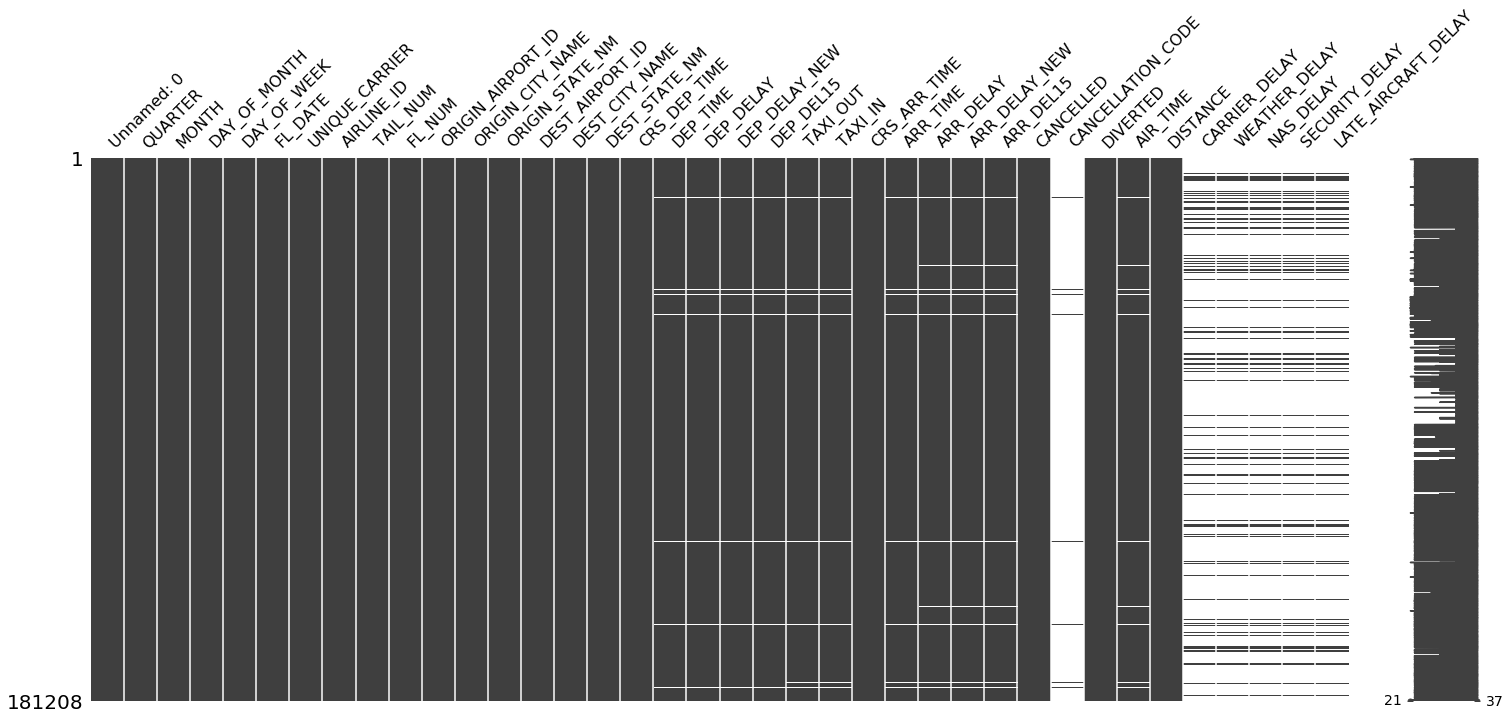

In [4]:
#This code was adopted from your notebooks
mn.matrix(df_dfw.sort_values(by=["Unnamed: 0",]))

#The code is from the class code, we modified the sorted valus inside the bracket.

After visualizing missing data, according to the plot above, there exist a large number of missing values in the feature "Cancellation_Code". Since cancelled flights are not our interest, we eliminate all cancelled flights data, where the feature CANCELLED is recorded as "0."

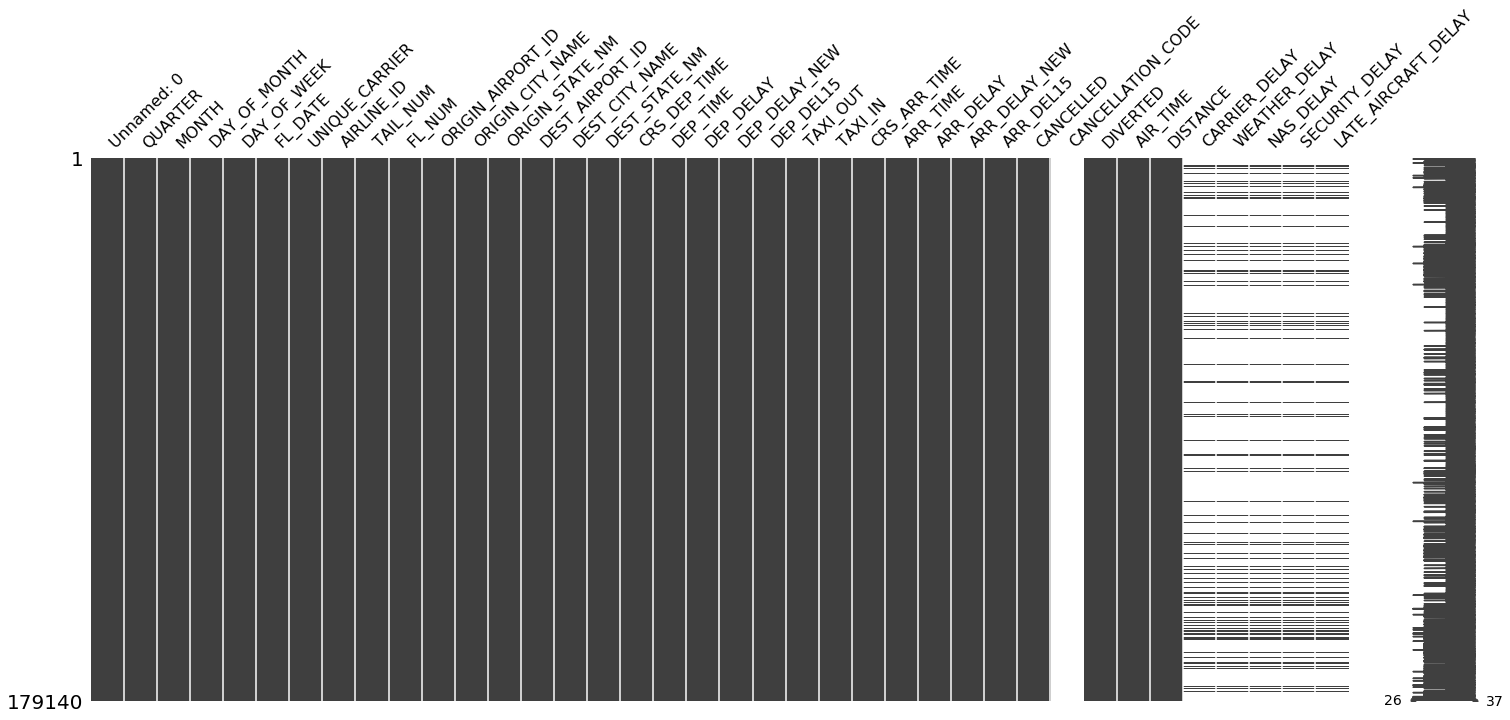

In [5]:
#This code was adopted from your notebooks
df_dfw_uncancelled = df_dfw[df.CANCELLED != 1]
mn.matrix(df_dfw_uncancelled.sort_values(by=["Unnamed: 0",]))

Although most columns seem to have no missing value, there are still a couple features contain small number of missing data. In order to complete this cleaning process, we sum up the number of the missing value under each column to find the most uncomplete ones.

In [6]:
print(df_dfw_uncancelled.isnull().sum())

Unnamed: 0                  0
QUARTER                     0
MONTH                       0
DAY_OF_MONTH                0
DAY_OF_WEEK                 0
FL_DATE                     0
UNIQUE_CARRIER              0
AIRLINE_ID                  0
TAIL_NUM                    0
FL_NUM                      0
ORIGIN_AIRPORT_ID           0
ORIGIN_CITY_NAME            0
ORIGIN_STATE_NM             0
DEST_AIRPORT_ID             0
DEST_CITY_NAME              0
DEST_STATE_NM               0
CRS_DEP_TIME                0
DEP_TIME                    0
DEP_DELAY                   0
DEP_DELAY_NEW               0
DEP_DEL15                   0
TAXI_OUT                    0
TAXI_IN                    34
CRS_ARR_TIME                0
ARR_TIME                   34
ARR_DELAY                 532
ARR_DELAY_NEW             532
ARR_DEL15                 532
CANCELLED                   0
CANCELLATION_CODE      179140
DIVERTED                    0
AIR_TIME                  532
DISTANCE                    0
CARRIER_DE

STEP 1:

There are 34 missing value under the "TAXI_IN" and "ARR_TIME" column.  Since ARRIVAL_TIME should not have any association with TAXI_IN time, these missing value are more than likely mistaken, such as loss of information while collecting. Since 34 observation is only a tiny fraction of a dataset that is nearly 180K count, we are not loosing that much information with removin the. Therefore, these observations are decided to be eliminated. (Method = Elimination)

In [7]:
# Clear these 34 missing value under TAXI_IN column
df_dfw_uncancelled_1 = df_dfw_uncancelled[df_dfw_uncancelled['TAXI_IN'].notnull()]
print(df_dfw_uncancelled_1.isnull().sum())

Unnamed: 0                  0
QUARTER                     0
MONTH                       0
DAY_OF_MONTH                0
DAY_OF_WEEK                 0
FL_DATE                     0
UNIQUE_CARRIER              0
AIRLINE_ID                  0
TAIL_NUM                    0
FL_NUM                      0
ORIGIN_AIRPORT_ID           0
ORIGIN_CITY_NAME            0
ORIGIN_STATE_NM             0
DEST_AIRPORT_ID             0
DEST_CITY_NAME              0
DEST_STATE_NM               0
CRS_DEP_TIME                0
DEP_TIME                    0
DEP_DELAY                   0
DEP_DELAY_NEW               0
DEP_DEL15                   0
TAXI_OUT                    0
TAXI_IN                     0
CRS_ARR_TIME                0
ARR_TIME                    0
ARR_DELAY                 498
ARR_DELAY_NEW             498
ARR_DEL15                 498
CANCELLED                   0
CANCELLATION_CODE      179106
DIVERTED                    0
AIR_TIME                  498
DISTANCE                    0
CARRIER_DE

STEP 2:

There were 498 observations that have missing value under "ARR_DELAY", "ARR_DELAY_NEW","ARR_DEL15", and "AIR_TIME"(ARR_DELAY is associated with other three varialbes. Thus, missing value on "ARR_DELAY" would cause missing on other columns). There were not mistakes. The reason of missing might be the lossing of information. 498 is less than 0.3% of the total observation. Thus, we decided to eliminate those missing value observations. (Method = Elimination)

In [8]:
# Clear these 498 missing value under ARR_DELAY column
df_dfw_uncancelled_2 = df_dfw_uncancelled_1[df_dfw_uncancelled_1['ARR_DELAY'].notnull()]
print(df_dfw_uncancelled_2.isnull().sum())

Unnamed: 0                  0
QUARTER                     0
MONTH                       0
DAY_OF_MONTH                0
DAY_OF_WEEK                 0
FL_DATE                     0
UNIQUE_CARRIER              0
AIRLINE_ID                  0
TAIL_NUM                    0
FL_NUM                      0
ORIGIN_AIRPORT_ID           0
ORIGIN_CITY_NAME            0
ORIGIN_STATE_NM             0
DEST_AIRPORT_ID             0
DEST_CITY_NAME              0
DEST_STATE_NM               0
CRS_DEP_TIME                0
DEP_TIME                    0
DEP_DELAY                   0
DEP_DELAY_NEW               0
DEP_DEL15                   0
TAXI_OUT                    0
TAXI_IN                     0
CRS_ARR_TIME                0
ARR_TIME                    0
ARR_DELAY                   0
ARR_DELAY_NEW               0
ARR_DEL15                   0
CANCELLED                   0
CANCELLATION_CODE      178608
DIVERTED                    0
AIR_TIME                    0
DISTANCE                    0
CARRIER_DE

STEP 3:

Since there is no cancelled flight information concerned with the purpose of this prediction, the CANCELLATION_CODE feature is determined to be completely eliminated.

STEP 4:

Due to the industry practice of 15 minutes of more delay is considered as flight delay, the majority of data are empty under columns CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, and LATE_AIRCRAFT_DELAY. These data are determined to be left alone, neither to be imputed nor eliminated.

In [9]:
# Check how many flights were not consider as delay (delay mins <=15)
df_dfw_uncancelled_2[df_dfw_uncancelled_2['ARR_DEL15'] ==0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149363 entries, 1 to 984915
Data columns (total 38 columns):
Unnamed: 0             149363 non-null int64
QUARTER                149363 non-null int64
MONTH                  149363 non-null int64
DAY_OF_MONTH           149363 non-null int64
DAY_OF_WEEK            149363 non-null int64
FL_DATE                149363 non-null datetime64[ns]
UNIQUE_CARRIER         149363 non-null object
AIRLINE_ID             149363 non-null int64
TAIL_NUM               149363 non-null object
FL_NUM                 149363 non-null int64
ORIGIN_AIRPORT_ID      149363 non-null int64
ORIGIN_CITY_NAME       149363 non-null object
ORIGIN_STATE_NM        149363 non-null object
DEST_AIRPORT_ID        149363 non-null int64
DEST_CITY_NAME         149363 non-null object
DEST_STATE_NM          149363 non-null object
CRS_DEP_TIME           149363 non-null int64
DEP_TIME               149363 non-null float64
DEP_DELAY              149363 non-null float64
DEP_DELAY_NEW  

Now, we start converting Arrival delay to three categories: "early" (delay<0 mins), "on time" (0 < delay < 15 mins), and "late" (delay > 15 mins).

In [10]:
#re-define the variable df_dfw_uncancelled so that it is easy to use in the future
df_dfw_uncancelled = df_dfw_uncancelled_2 

# add a new column to the data where defines the flight status
df_dfw_uncancelled['Status'] =pd.cut(df_dfw_uncancelled['ARR_DELAY'],[-1e6,0,15,1e6],labels=['early','on_time','late'])


The ratio of each flights status

the percentage of early fligtis 67.8553032338977 %
the percentage of on time fligtis 16.37160709486697 %
the percentage of late fligtis 15.77308967123533 %


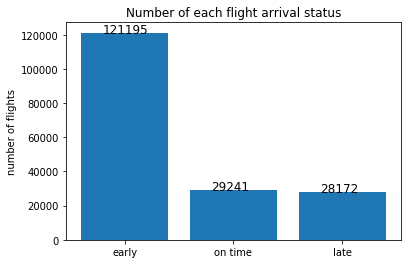

In [11]:
df_grouped = df_dfw_uncancelled.groupby(by=['Status']).count()
df_grouped = df_grouped['Unnamed: 0']
status = ('early','on time','late')
plt.bar(status,df_grouped[:])
plt.ylabel("number of flights")
plt.title('Number of each flight arrival status')
for i in range(len(df_grouped[:])):
    plt.text(x = i-0.2, y = df_grouped[i], s = df_grouped[i], size = 12)
    
    print("the percentage of", status[i], "fligtis",df_grouped[i]/sum(df_grouped)*100, '%')



As we explained in the lab 1, the cancellation code is useless since we are focusing on the uncancelled flight. Thus, we drop the cancellation_code. Also, Due to the industry practice of 15 minutes of more delay is considered as flight delay, the majority of data are empty under columns CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, and LATE_AIRCRAFT_DELAY. These data are determined to be left alone, neither to be imputed nor eliminated.

We get rid of the Tail number (TAIL_NUM) though certain delay may caused by defected airplanes (they may purhcase new planes or destroy these old planes). 

We drop the Flight number (FL_NUM) because flight number may change by certain period. We get rid of flight date (FL_DATE) because it is a duplicated info in our table data. 

Since we are keeping the carrrier name, we drop the airline ID column (AIRLINE_ID). 

We get rid of all delay info except the depature delay(CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, LATE_AIRCRAFT_DELAY, ARR_DELAY, ARR_DELAY_NEW, ARR_DEL15) becuase the machine can easily tell that the flight is clasified as a delay once there is a positive input on these delay, and anything associates with arrival delay is summarized udner status.

We drop the column 'Quarter' (QUARTER) since 'Month' is giving us more information.

We drop the column 'Origin Airport ID' (ORIGIN_AIRPORT_ID), the column 'Origin state name' (ORIGIN_STATE_NM), the column 'Destination Airport ID' (DEST_AIRPORT_ID), the column 'Destination state name' (DEST_STATE_NM).

Since we do not have that much information about taxis, we drop column "Taxi in" and "Taxi out" (TAXI_OUT, TAXI_IN).

We drop (CANCELLED) and (DIVERTED) since they do not affect the arrival delay we try to classify.

We drop (DEP_DELAY), (DEP_DELAY_NEW), and (DEP_DEL15) since we cannot have these information before we sell the ticket.

We get rid of (DEP_TIME) and (ARR_TIME) since we cannot tell the actual departure and arrival time when we sell the ticket.

(Unnamed: 0) is useless so we drop it.

In [12]:
df_dfw_uncancelled.columns

Index(['Unnamed: 0', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK',
       'FL_DATE', 'UNIQUE_CARRIER', 'AIRLINE_ID', 'TAIL_NUM', 'FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_NM',
       'DEST_AIRPORT_ID', 'DEST_CITY_NAME', 'DEST_STATE_NM', 'CRS_DEP_TIME',
       'DEP_TIME', 'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DEL15', 'TAXI_OUT',
       'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'ARR_DELAY_NEW',
       'ARR_DEL15', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'AIR_TIME',
       'DISTANCE', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
       'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'Status'],
      dtype='object')

In [13]:
df_dfw_uncancelled = df_dfw_uncancelled.drop(['CANCELLATION_CODE','TAIL_NUM','FL_NUM','FL_DATE','AIRLINE_ID','CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY'
                                     ,'SECURITY_DELAY','LATE_AIRCRAFT_DELAY','ARR_DELAY','ARR_DELAY_NEW','ARR_DEL15','ORIGIN_AIRPORT_ID'
                                      , 'ORIGIN_STATE_NM','DEST_AIRPORT_ID','DEST_STATE_NM', 'QUARTER','TAXI_OUT','TAXI_IN','CANCELLED'
                                     ,'DIVERTED', 'DEP_DELAY_NEW', 'DEP_DEL15','DEP_DELAY', 'DEP_TIME','ARR_TIME','Unnamed: 0'],axis = 1)


By doing some feature engineering, since spped can capture both the distance and air time features. Thus, we create a variable called "Speed", and drop (DISTANCE) and (AIRTIME).

In [14]:
df_dfw_uncancelled['SPEED'] = df_dfw_uncancelled['DISTANCE']/df_dfw_uncancelled['AIR_TIME']*60
df_dfw_uncancelled =  df_dfw_uncancelled.drop(['DISTANCE', 'AIR_TIME'], axis = 1)

Since we know the destination is DFW, we drop the DEST_CITY_NAME column.

In [15]:
df_dfw_uncancelled = df_dfw_uncancelled.drop(['DEST_CITY_NAME'], axis = 1)

Categorized the time variables.

In [16]:
df_dfw_uncancelled["CRS_DEP_TIME"] = pd.cut(df_dfw_uncancelled["CRS_DEP_TIME"],[0,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,
                                                           1600,1700,1800,1900,2000,2100,2200,2300,2400], labels=[0,1,2,3,4,5,6,
                                                                                                                 7,8,9,10,11,12,
                                                                                                                 13,14,15,16,17,
                                                                                                                 18,19,20,21,22,
                                                                                                                 23])


df_dfw_uncancelled["CRS_ARR_TIME"] = pd.cut(df_dfw_uncancelled["CRS_ARR_TIME"],[0,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,
                                                           1600,1700,1800,1900,2000,2100,2200,2300,2400], labels=[0,1,2,3,4,5,6,
                                                                                                                 7,8,9,10,11,12,
                                                                                                                 13,14,15,16,17,
                                                                                                                 18,19,20,21,22,
                                                                                                                 23])

Convert categorical varialbes to dummy variable using one hot encoding.

In [17]:
MONTH = pd.get_dummies(df_dfw_uncancelled['MONTH'])
DAY_OF_MONTH = pd.get_dummies(df_dfw_uncancelled['DAY_OF_MONTH'])
DAY_OF_WEEK = pd.get_dummies(df_dfw_uncancelled['DAY_OF_WEEK'])
UNIQUE_CARRIER = pd.get_dummies(df_dfw_uncancelled['UNIQUE_CARRIER'])
ORIGIN_CITY_NAME = pd.get_dummies(df_dfw_uncancelled['ORIGIN_CITY_NAME'])
time1 = pd.get_dummies(df_dfw_uncancelled["CRS_DEP_TIME"])
time2 = pd.get_dummies(df_dfw_uncancelled["CRS_ARR_TIME"])
df_clean = pd.concat([MONTH, DAY_OF_MONTH, DAY_OF_WEEK, UNIQUE_CARRIER, ORIGIN_CITY_NAME,time1,time2,
                     df_dfw_uncancelled['SPEED'], df_dfw_uncancelled['Status']], axis = 1)

Rescale the speed variable from range 0 to 1 using max_min calculation.

In [18]:
df_clean['SPEED'] = (df_clean['SPEED']-df_clean['SPEED'].min())/(df_clean['SPEED'].max()-df_clean["SPEED"].min())

In [19]:
df_clean

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,SPEED,Status
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.554582,on_time
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.536025,on_time
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.536025,on_time
7,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0.563210,late
17,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.587948,late
21,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.570343,on_time
22,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.566759,early
23,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0.570343,early
35,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.572740,early
39,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.573963,early


# 3 Data Evaluation

## 3.1 Metrics measurement

**Which method/ratio?**

There are two type of scenarios we mainly concern with. From the AA's perspective, any on time flight we predict as delay flight will decrease the owner's profit (because these tickets will be discounted), and any delay flight we predict as on time flight will lower the customer's loyalty (customers get charged the same with worse experience). In order to fix the first issue, we need to calculate the recall for the confusion matrix. For the second issue, we need to calculate the precision. Thus, to balance these two ratios, we decide to calculate the **f1-score** since it is a weighted average(also known as harmonic average)of recall and precission for our model.
F1 score is usually only for the binary case, where in our dataset, we have a multiclass problem. so to solve this, we have to aggregate the scores over each class. There are 2 ways to do this **micro** is calculated for the individual TPs, TNs, FPs, FNs of the confusion matrix, it is useful when we want to weight each instance equally where the **macro** is calculated as the average scores of the confusion matrix, it weights classes equally to evaluate the overall performance og an algorithm with regards to the most frequent class labels.

F1 is usually a binary evaluation metrics, when we use it to evaluate multiclass classification models in sklearn, a weighted variant of the macro-average is used by default, the weighted macro-average is calculated by weighting the score of each class label by the number of true instances when calculating the average. Thus the weighted macro-average is useful if we are dealing with class imbalance, which is our case, so that's why we are choosing the F1 weighted macro-average score.

$$F1_{micro} = 2\times \frac {PREC_1 \times REC_1 + ... + PREC_n \times REC_n} {PREC_1 + REC_1 +  ... + PREC_n + REC_n} $$

$$F1_{macro} = 2\times \frac {F1_1 + F1_2 + ... F1_n} {n} $$

**Why not accuracy score?**

Since we are trying to attract more customers, the prediction of our algorithm should be as "accurate" as possible. The ratio of desire flight is (arrive on time and arrive early) more than 84%. Thus, the algorithm will achieve good performance if it predict every flight arrive early (under the statistical aspect, it only has 65% accuracy. But under the business aspect, early arrival can be consider as on time arrival). 
And since our data exists a class imbalance problem, accuracy score is not a good choice.


## 3.2 Cross Validation method

Our data set is unique, since it has a time series effect, and it has class imbalance problem in it. Since time series is out of the scope of this lab and we want to make our life easier, we will just deal with the class imbalance problem and assume that there is no time series effect, which means that the flight delays are independent of each other and the delay of a specific flight doesn't give any additional information of the delay of any other flight. But realistically this assumption is totally fine, since the flights are mainly delayed because of the security, aircraft, and airlne delays from the origin and rarely from the destinantion. so we think it's a very rasonable assumption to take.


For the method of dividing the training and testing data, we believe this is the most important key for a succesful deployment of a machine learning algorithm, since there is alot of data now a day, any machine learning project will be trained on a sample of the desired population. assuming that the sample is representitve of the population, we want to make sure we are learning from the data not memorizing! in order to expplain this, let's assume a situation where in a machine learning class the students have a midterm and the professor has given the students 3 page notes that summarizes what will be in the midterm. If the midterm is exactly from the 3 page notes, that is what we call overfit(low bias, high variance). if it's completely different they will have a simple approach and that underfit(low variance, high bias). if it's some how similar to the notes but different at the same time, we will have a perfect fit(sweet spot of the bias variance tradeoff)! this is a really good visualization of the situation we described



<img src="https://raw.githubusercontent.com/M-Elsaied/NYC-Taxi-Analysis/master/data/Visualization/fitting.png" alt="FittingCurves" width="800" height="600" title="FittingCurves">

So what we want is to help the algorithm to understand the data and not memorize it, so if we do a simple train, test split the model can overfit or underfit, depending on what is in the training set.

In order to solve the bias-variance trade off we can use the Kfold cross validation, which sample without replacment into Kfolds and thus have k-1 train and the test set would be the kth fold and then can run k models on the k folds and then take the average of these models, this way we have a stable, and consistent model(It's the same idea of ensembles, but the only difference that it aggregates the same model on different folds of the data by thaking the average and it usually decreases the variance)!
Beside that, it's a really powerful tool for the hyperparameters tuning via grid search.

For the number of K folds, it's a bias-variance tradeoff where after alot of simulations by Trevor Hestie & Rob Tibsharani, it appears that k between 5 and 10 is the best number as shown in the figure below(figure from ISL chapter 5)

<img src="https://raw.githubusercontent.com/M-Elsaied/NYC-Taxi-Analysis/master/data/Visualization/kfold.PNG" alt="FittingCurves" width="600" height="400" title="FittingCurves">

There is also emperical evidence that shows a good standard for value of k is 10, where experiments by Ron Kohavi on various real-world datasets suggest the 10-fold cross-validation offers the best bias-variance tradeoff.

Given all of this we have choosen 10-fold stratified cross validation


In [20]:

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np

#we need to standardize the continous variables
#need to fix the time
y = df_clean[['Status']]
y = y.replace(['early','on_time','late'],[0,1,2])
X = df_clean.drop(['Status'], axis=1)

y=np.array(y)
y = np.hstack(y)
y = y.astype('int32')
X = np.array(X)

print(X.shape)
print(y.shape)
print(np.min(X),np.max(X))
print(np.unique(y))

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(178608, 239)
(178608,)
0.0 1.0
[0 1 2]
(142886, 239)
(142886,)
(35722, 239)
(35722,)


In [21]:
import numpy as np
from scipy.special import expit
import sys
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator, ClassifierMixin

# start with a simple base classifier, which can't be fit or predicted
# it only has internal classes to be used by classes that will subclass it
class TwoLayerPerceptronBase(BaseEstimator, ClassifierMixin ):
    def __init__(self, n_hidden=(30, 50),
                 C=0.0, epochs=500, eta=0.001, random_state=None, phi = 'sigmoid', cost = 'mse'):
        np.random.seed(random_state)
        self.n_hidden = n_hidden
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        self.n_layers = len(self.n_hidden) ###The number of layer is depend on the list length of the number of neturons. 
        self.phi = phi
        self.phi_dict = {'sigmoid':self._sigmoid,
                         'linear':self._linear,
                        'ReLU':self._ReLU,
                        'SiLU':self._SiLU}
        self.cost = cost
        
    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T
            
        return onehot

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        Weights = []  ###We create an empty list. We use it to sotre all weights to it.
        
        
        s, n = self.n_hidden[0], self.n_features_ + 1 ###define the S1 and N+1, which is the dimension for the first weight
        for i in range (self.n_layers): ###This for loop is using to calculate the hidden layer weights, which means we stop at the n_layer[-1]
            W1_num_elems = n*s          ###The first iteration will be N+1 by S1(column vector).
            #print (W1_num_elems)
            W1 = np.random.uniform(-1.0, 1.0, size=W1_num_elems) 
            W1 = W1.reshape(s, n) # reshape to be W
            Weights.append(W1)
            if i == self.n_layers-1: ###The stopping critira. Since pythong index starts from 0, we break it at n_layers -1
                break
            s, n = self.n_hidden[i+1], self.n_hidden[i]+1 ###Update the S and N+1 for the next weight, which is S2 and S1+1
            
        
        W2_num_elems = (self.n_hidden[-1] + 1)*self.n_output_ ###The out_layer weight dimension, the S(layers-1)+1*S(Layers)
        W2 = np.random.uniform(-1.0, 1.0, size=W2_num_elems)
        W2 = W2.reshape(self.n_output_, self.n_hidden[-1] + 1)
        Weights.append(W2)
        
        return Weights
    
            
    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)
    
    @staticmethod
    def _linear(z):
        return z
    
    @staticmethod
    def _ReLU(z):
        res = np.sign(z)
        res[z <= 0] = 0
        return res*z
    
    @staticmethod
    def _SiLU(z):
        return z*expit(z)

    
    @staticmethod
    def _add_bias_unit(X, how='column'):
        """Add bias unit (column or row of 1s) to array at index 0"""
        if how == 'column':
            ones = np.ones((X.shape[0], 1))
            X_new = np.hstack((ones, X))
        elif how == 'row':
            ones = np.ones((1, X.shape[1]))
            X_new = np.vstack((ones, X))
        return X_new
    
    @staticmethod
    def _L2_reg(lambda_, Weights):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        k = 0.
        for i in range (len(Weights)):
            k += np.mean(Weights[i][:, 1:] ** 2)
        return (lambda_/2.0) * np.sqrt(k)
    
    def _cost_fun(self,A3,Y_enc,Weights):#need to add the cross entropy here
        '''Get the objective function value'''
        if self.cost == 'mse':
            cost_fun = np.mean((Y_enc - A3)**2)
        elif self.cost == 'entropy':
            cost_fun = -np.mean(np.nan_to_num((Y_enc*np.log(A3)+(1-Y_enc)*np.log(1-A3))))
        else:
            raise Exception('No cost function named '+self.cost+' was found!!')
        L2_term = self._L2_reg(self.l2_C, Weights)
        return cost_fun + L2_term
    
class TwoLayerPerceptron(TwoLayerPerceptronBase):
    def _feedforward(self, X, Weights):
        """Compute feedforward step
        -----------
        X : Input layer with original features.
        W1: Weight matrix for input layer -> hidden layer.
        W2: Weight matrix for hidden layer -> output layer.
        ----------
        a1-a3 : activations into layer (or output layer)
        z1-z2 : layer inputs 

        """
        A,Z = [],[]
        temp = X.T
        for i in range (len(Weights)):   ###We calculate all a value and store them into A
            A1 = self._add_bias_unit(temp, how='row')
            Z1 = Weights[i] @ A1
            A.append(A1)
            Z.append(Z1)
            if i == len(Weights)-1:
                continue
            A_next = self.phi_dict[self.phi](Z1)
            temp = A_next
            
        A.append(self.phi_dict['sigmoid'](Z1))
        
        return A, Z
    
    def _phi_dot(self,a):
        if self.phi == 'sigmoid':
            return a*(1-a)
        elif self.phi == 'linear':
            return 1
        elif self.phi == 'ReLU':
            res = np.sign(a)
            res[a <=0 ] = 0
            return res
        elif self.phi == 'SiLU':
            # f(x) + sigma(x)(1-f(x))
            return a + expit(a)*(1-a)
        else:
            raise Exception('No phi function named '+self.phi+' was found!!')
    
    def _get_gradient(self, A, Z, Y_enc, Weights):
        """ Compute gradient step using backpropagation.
        """
        # backpropagation
        grad = [np.zeros(i.shape) for i in Weights] 
        
        # for each instance's activations 
        lis = [x.T for x in A]+[Y_enc.T]    ###each instane with its Y as column vector representation
        
        #define mse & cross entropy before or in for loop?
        
        
        for a in zip(*lis):
            #print (a)
            a1,y1 = a[:-1],a[-1] ###We do it backwardly. Thus, the first iteration is getting the output a(L)
            if self.cost == 'mse':
                dJ_dz2 = -2*(y1 - a1[-1])*(a1[-1]*(1-a[-1]))###self._phi_dot return the derivative value of a(L)
            elif self.cost == 'entropy':
                dJ_dz2 = a[-1]-y 
                #cross entropy = -[((Y/Activation) * derivative) + ((1-y)/(1-Activation) * -derivative)]
            else:
                raise Exception('No cost function named '+self.cost+' was found!!')
           
            grad[-1] += dJ_dz2[:,np.newaxis]  @ a1[-2][np.newaxis,:] ###The gradient will be used to update the outlayer weight
            
            
            for i in range (len(Weights)-1): ###This for loop calcualte the hidden layer gradient
                #print (dJ_dz2.shape,'dj_dz2')
                #print (Weights[-(i+1)].shape,'Weights['+str(len(Weights)-i)+']')
                #print (np.diag(a1[-(i+2)]*(1-a1[-(i+2)])).shape,'diag')
                dJ_dz1 = dJ_dz2 @ Weights[-(i+1)] @ np.diag(self._phi_dot(a1[-(i+2)]))
                         
                grad[-(i+2)] += dJ_dz1[1:,np.newaxis] @ a1[-(i+3)][np.newaxis,:] 
                
                dJ_dz2 = dJ_dz1[1:,np.newaxis].reshape((Weights[-(i+2)].shape[0]))
                
            # don't incorporate bias term in the z1 gradient 
            # (its added in a2 from another layer)
            

        # regularize weights that are not bias terms
        for i in range (len(grad)):
            grad[i][:, 1:] += (Weights[i][:, 1:] * self.l2_C)

        return grad
    
    def predict(self, X):
        """Predict class labels"""
        all_A, all_Z = self._feedforward(X, self.Weights)
        y_pred = np.argmax(all_A[-1], axis=0)
        return y_pred
    
    
    def fit(self, X, y, print_progress=False, XY_test=None):
        """ Learn weights from training data."""
        
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.Weights = self._initialize_weights()

        self.cost_ = []
        self.score_ = []
        self.score_.append(accuracy_score(y_data,self.predict(X_data)))
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
        for i in range(self.epochs):

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            # feedforward all instances
            A, Z = self._feedforward(X_data,self.Weights)
            #print (A[-1][0])
            cost = self._cost_fun(A[-1],Y_enc,self.Weights)
            self.cost_.append(cost)

            # compute gradient via backpropagation
            grad = self._get_gradient(A = A, Z = Z, Y_enc=Y_enc,
                                              Weights=self.Weights)
            
            for i in range (len(self.Weights)):

                self.Weights[i] -= self.eta * grad[i]
            

        return self
    
class TwoLayerPerceptronVectorized(TwoLayerPerceptron):
    # just need a different gradient calculation
    def _get_gradient(self, A, Z, Y_enc, Weights):
        """ Compute gradient step using backpropagation.
        """
        grad = [np.zeros(i.shape) for i in Weights]
        # vectorized backpropagation
        #V2 = -2*(Y_enc-A[-1])*self._phi_dot(A[-1]) 
        
        if self.cost == 'mse':
                V2 = -2*(Y_enc - A[-1])*(A[-1]*(1-A[-1]))###self._phi_dot returns the derivative value of a(L)
        elif self.cost == 'entropy':
                #print (Y_enc/self._phi_raw(A[-1]))
                V2 = (A[-1]-Y_enc)
                #V2 = -((((Y_enc/A[-1])* self._phi_dot(A[-1])) + (((1-Y_enc)/(1-A[-1])) * self._phi_dot(-A[-1])))) 
                #cross entropy = -[((Y/Activation) * derivative) + ((1-y)/(1-Activation) * -derivative)]
        else:
                raise Exception('No cost function named '+self.cost+' was found!!')
        
        #print (V2.shape)
        grad[-1] = V2 @ A[-2].T
        for i in range (self.n_layers):
            V1 = (self._phi_dot(A[-(i+2)]))*(Weights[-(i+1)].T @ V2)
            grad[-(i+2)] = V1[1:,:] @ A[-(i+3)].T
            V2 = V1[1:,:] ###update the V2 
            #print (V2.shape)
            
        
        
        for i in range (len(grad)):
            # regularize weights that are not bias terms
            grad[i][:, 1:] += Weights[i][:, 1:] * self.l2_C

        return grad
    

In [22]:
from sklearn.metrics import accuracy_score
# just start with the vectorized version and minibatch
class TLPMiniBatchBase(TwoLayerPerceptronVectorized):
    def __init__(self, alpha=0.0, decrease_const=0.0, shuffle=True, 
                 minibatches=1, **kwds):        
        # need to add to the original initializer 
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.shuffle = shuffle
        self.minibatches = minibatches
        # but keep other keywords
        super().__init__(**kwds)
        
    
    def fit(self, X, y, print_progress=False):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.Weights = self._initialize_weights()
        
        self.grad_W = [] 
        for i in range (len(self.Weights)):
            self.grad_W.append([])
            
        self.weight_W = [] 
        for i in range (len(self.Weights)):
            self.weight_W.append([])

        delta_W_prev = []
        for i in range (len(self.Weights)):
            delta_W_prev.append(np.zeros(self.Weights[i].shape))

        self.cost_ = []
        self.score_ = []
        # get starting acc
        self.score_.append(accuracy_score(y_data,self.predict(X_data)))
        for i in range(self.epochs):

            # adaptive learning rate
            self.eta /= (1 + self.decrease_const*i)

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini:

                # feedforward
                A, Z = self._feedforward(X_data[idx], self.Weights)
                
                cost = self._cost_fun(A[-1],Y_enc[:, idx],self.Weights)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                grad = self._get_gradient(A = A, Z = Z, Y_enc=Y_enc[:, idx],
                                                  Weights=self.Weights)

                # momentum calculations
                for i in range (len(grad)):
                    delta_w = self.eta * grad[i]
                    self.Weights[i] -= delta_w + self.alpha * delta_W_prev[i]
                    delta_W_prev[i] = delta_w

            self.cost_.append(mini_cost)
            self.score_.append(accuracy_score(y_data,self.predict(X_data)))
            
            for i in range (len(self.grad_W)):
                self.grad_W[i].append(np.mean(grad[i]))
            for i in range (len(self.weight_W)):
                self.weight_W[i].append(np.mean(self.Weights[i]))
                
        for i in range (len(self.grad_W)):
            self.grad_W[i] = np.array(self.grad_W[i])
        for i in range (len(self.grad_W)):
            self.weight_W[i] = np.array(self.weight_W[i])
            
        return self

In [23]:
class TLPMiniBatch(TLPMiniBatchBase): 
            
    
    def _get_gradient(self, A, Z, Y_enc, Weights):
        """ Compute gradient step using backpropagation.
        """
        grad = [np.zeros(i.shape) for i in Weights]
        # vectorized backpropagation
        #V2 = -2*(Y_enc-A[-1])*self._phi_dot(A[-1]) 
        
        if self.cost == 'mse':
                V2 = -2*(Y_enc - A[-1])*(A[-1]*(1-A[-1]))###self._phi_dot returns the derivative value of a(L)
        elif self.cost == 'entropy':
                V2 = (A[-1]-Y_enc)
                #V2 = -((((Y_enc/A[-1])* self._phi_dot(A[-1])) + (((1-Y_enc)/(1-A[-1])) * self._phi_dot(-A[-1])))) 
                #cross entropy = -[((Y/Activation) * derivative) + ((1-y)/(1-Activation) * -derivative)]
        else:
                raise Exception('No cost function named '+self.cost+' was found!!')
        
        #print (V2.shape)
        grad[-1] = V2 @ A[-2].T
        for i in range (self.n_layers):
            V1 = (self._phi_dot(A[-(i+2)]))*(Weights[-(i+1)].T @ V2)
            grad[-(i+2)] = V1[1:,:] @ A[-(i+3)].T
            V2 = V1[1:,:] ###update the V2 
            #print (V2.shape)
            
        
        
        for i in range (len(grad)):
            # regularize weights that are not bias terms
            grad[i][:, 1:] += Weights[i][:, 1:] * self.l2_C

        return grad

In [24]:
vals = { 'n_hidden':(30,30), 
         'C':0.1, 'epochs':20, 'eta':0.001, 
         'alpha':0.001, 'decrease_const':1e-5, 'minibatches':50,
         'shuffle':True,'random_state':1, 'phi' : 'sigmoid', 'cost':'mse'}

nn_quad = TLPMiniBatch(**vals)#TLPMiniBatch(**vals)
nn_quad.fit(X_train, y_train, print_progress=1)
yhat = nn_quad.predict(X_test)
#print (np.unique(yhat))
print('Test acc:',accuracy_score(y_test,yhat))

Epoch: 20/20

Test acc: 0.6824925816023739


In [25]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
kfold = StratifiedKFold(n_splits=10,
                            random_state=1).split(X_train, y_train)
vals = { 'n_hidden':(30,30), 
         'C':0.1, 'epochs':20, 'eta':0.001, 
         'alpha':0.001, 'decrease_const':1e-5, 'minibatches':50,
         'shuffle':True,'random_state':1, 'phi' : 'sigmoid', 'cost':'entropy'}
nn = TLPMiniBatch(**vals)
scores = []
for k, (train, test) in enumerate(kfold):
    nn.fit(X_train[train], y_train[train])
    yhat = nn.predict(X_train[test])
    score = f1_score(yhat, y_train[test], average='weighted')
    scores.append(score)
    print('Fold: %s, Class dist.: %s, F1_score: %.3f' % (k+1,
          np.bincount(y_train[train]), score))
    
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Fold: 1, Class dist.: [87204 21116 20276], F1_score: 0.802
Fold: 2, Class dist.: [87204 21116 20276], F1_score: 0.806
Fold: 3, Class dist.: [87204 21116 20276], F1_score: 0.797
Fold: 4, Class dist.: [87204 21117 20276], F1_score: 0.801
Fold: 5, Class dist.: [87205 21117 20276], F1_score: 0.797
Fold: 6, Class dist.: [87205 21117 20276], F1_score: 0.803
Fold: 7, Class dist.: [87205 21117 20276], F1_score: 0.787
Fold: 8, Class dist.: [87205 21117 20276], F1_score: 0.792
Fold: 9, Class dist.: [87205 21117 20276], F1_score: 0.801
Fold: 10, Class dist.: [87205 21117 20277], F1_score: 0.808

CV accuracy: 0.799 +/- 0.006


## Visualization of gradients

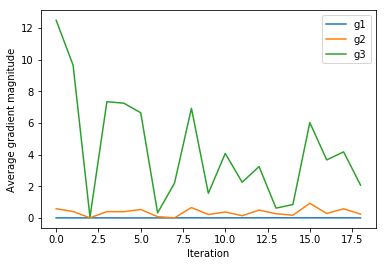

In [25]:
clf = nn_quad
#print (clf.grad_W[0])
ax = plt.subplot(1,1,1)

for i in range (len(clf.grad_W)):
    #print (abs(clf.grad_W[i][10:]))
    plt.plot(abs(clf.grad_W[i][1:]), label='g'+str(i+1))
plt.legend()
plt.ylabel('Average gradient magnitude')
plt.xlabel('Iteration')
plt.show()

Due to the highly sensitive nature of last layer as it is directly connected to the output, we see a high value for g3.

## Cross entropy vs quadratic loss

In [26]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

def print_result(nn,X_train,y_train,X_test,y_test,title="",color="red"):
    
    print("=================")
    print(title,":")
    yhat = nn.predict(X_train)
    print('Resubstitution acc:',accuracy_score(y_train,yhat))
    
    yhat = nn.predict(X_test)
    print('Validation acc:',accuracy_score(y_test,yhat))
    
    if hasattr(nn,'val_score_'):
        plt.plot(range(len(nn.val_score_)), nn.val_score_, color=color,label=title)
        plt.ylabel('Validation Accuracy')
    else:
        plt.plot(range(len(nn.score_)), nn.score_, color=color,label=title)
        plt.ylabel('Resub Accuracy')
        
    plt.xlabel('Epochs')
    plt.tight_layout()
    plt.legend(loc='best')
    plt.grid(True)

In [27]:
vals = { 'n_hidden':(30,), 
         'C':0.1, 'epochs':20, 'eta':0.001, 
         'alpha':0.001, 'decrease_const':1e-5, 'minibatches':50,
         'shuffle':True,'random_state':1}

nn_quad = TLPMiniBatch(**vals)

vals = { 'n_hidden':(30,), 
         'C':0.1, 'epochs':20, 'eta':0.001, 
         'alpha':0.001, 'decrease_const':1e-5, 'minibatches':50,
         'shuffle':True,'random_state':1, 'cost':'entropy'}

nn_cross = TLPMiniBatch(**vals)

%time nn_cross.fit(X_train, y_train, print_progress=1)
%time nn_quad.fit(X_train, y_train, print_progress=1)
print("Done")

Epoch: 20/20

CPU times: user 4min 13s, sys: 5min 3s, total: 9min 17s
Wall time: 21.6 s


Epoch: 20/20

CPU times: user 3min 44s, sys: 4min 36s, total: 8min 20s
Wall time: 19.6 s
Done


Cross Entropy Loss :
Resubstitution acc: 0.6833279677505144
Validation acc: 0.6860758076255529
Quadratic Loss :
Resubstitution acc: 0.6808364710328514
Validation acc: 0.6841162308941269


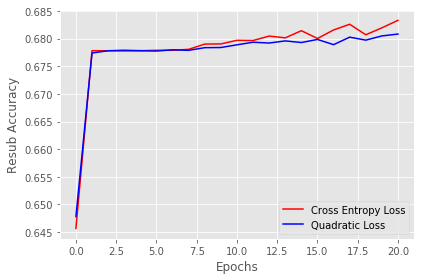

In [28]:


print_result(nn_cross,X_train,y_train,X_test,y_test,title="Cross Entropy Loss",color="red")
print_result(nn_quad,X_train,y_train,X_test,y_test,title="Quadratic Loss",color="blue")

plt.show()



# Tunning Hyper parameters

We have tried to use Grid Search of sci kit learn and it did not work as shown below. Therefore, we have decided to use a for loop to perform grid search for hyper parameters of our model. It will take more time but they do the same thing and we could not find a better choice.

In [30]:
"""from sklearn.metrics import make_scorer, f1_score
from sklearn.grid_search import GridSearchCV
f1_score = make_scorer(f1_score, 
                       pos_label = 1,
                      average = 'macro')

params = {'phi' : ('sigmoid', 'linear') }

nn = TwoLayerPerceptronVectorized()
gs = GridSearchCV(estimator = nn ,cv = 10, scoring = f1_score, param_grid = params)

gs = gs.fit(X_train, y_train)

print(gs.best_score_)
print(gs.best_params_)"""


"from sklearn.metrics import make_scorer, f1_score\nfrom sklearn.grid_search import GridSearchCV\nf1_score = make_scorer(f1_score, \n                       pos_label = 1,\n                      average = 'macro')\n\nparams = {'phi' : ('sigmoid', 'linear') }\n\nnn = TwoLayerPerceptronVectorized()\ngs = GridSearchCV(estimator = nn ,cv = 10, scoring = f1_score, param_grid = params)\n\ngs = gs.fit(X_train, y_train)\n\nprint(gs.best_score_)\nprint(gs.best_params_)"

In [31]:
"""from sklearn import svm, grid_search, datasets
iris = datasets.load_iris()
svr = TwoLayerPerceptronVectorized()
clf = grid_search.GridSearchCV(svr, params, scoring = 'f1_macro')
clf.fit(iris.data, iris.target)"""

"from sklearn import svm, grid_search, datasets\niris = datasets.load_iris()\nsvr = TwoLayerPerceptronVectorized()\nclf = grid_search.GridSearchCV(svr, params, scoring = 'f1_macro')\nclf.fit(iris.data, iris.target)"

## Grid search for hyper parameters

In this section grid search method is used to tune parameters phi, cost and number of hidden layers. We have fixed number of entropies to 50 to reduce total number of iterations. Therefore, we have 80 iterations in our grid search for which we used SMU ManeFrame II to solve this problem as shown below.

In [29]:
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold
output = np.zeros((80,17))
i = 0
limitfortest = 0 #I did put 0 to have only one iteration to test. In the M2 we put 71 and save results in output file.
for phi in {'sigmoid','linear','ReLU','SiLU'}:
    for cost in {'mse','entropy'}:
        for n_hidden in {(50,),(50,50),(50,50,50),(50,50,50,50),(50,50,50,50,50),(50,50,50,50,50,50),(50,50,50,50,50,50,50),(50,50,50,50,50,50,50,50),(50,50,50,50,50,50,50,50,50),(50,50,50,50,50,50,50,50,50,50)}:
            if i <= limitfortest:
                print('iteration:',i,'phi=',phi,'cost=',cost,'n_hidden=',n_hidden)
                vals = { 'n_hidden':n_hidden, 
                'C':0.1, 'epochs':20, 'eta':0.001, 
                 'alpha':0.001, 'decrease_const':1e-5, 'minibatches':50,
                 'shuffle':True,'random_state':1, 'phi' : phi, 'cost':cost}
                nn = TLPMiniBatch(**vals)#TLPMiniBatch(**vals)
                #nn.fit(X_train, y_train, print_progress=1)
                #yhat = nn.predict(X_test)
                #print('iteration',i,'Test acc:',accuracy_score(y_test,yhat),'f1 score:',f1_score(y_test,yhat, average='macro'))

                #vals = { 'n_hidden':(30,30), 
#                 'C':0.1, 'epochs':20, 'eta':0.001, 
#                 'alpha':0.001, 'decrease_const':1e-5, 'minibatches':50,
#                 'shuffle':True,'random_state':1, 'phi' : 'sigmoid', 'cost':'entropy'}
#                nn = TLPMiniBatch(**vals)
                kfold = StratifiedKFold(n_splits=10,random_state=1).split(X_train, y_train)
                scores = []
                for k, (train, test) in enumerate(kfold):
                    print('Fold',k+1,'is started now...')
                    nn.fit(X_train[train], y_train[train])
                    yhat = nn.predict(X_train[test])
                    score = f1_score(yhat, y_train[test], average='weighted')
                    scores.append(score)
                    print('Fold: %s, Class dist.: %s, F1_score: %.3f' % (k+1,
                      np.bincount(y_train[train]), score))
    
                print('\n CV F1 Score: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
                """params = dict(n_hidden=n_hidden, 
                  C=0.1, # tradeoff L2 regularizer
                  epochs=200, # iterations
                  eta=0.001,  # learning rate
                  random_state=1,
                  phi = phi,
                  cost = cost)"""
                output[i,0] = (int(phi=='sigmoid')+2*int(phi=='linear')+3*int(phi=='ReLU')+4*int(phi=='SiLU'))
                output[i,1] = (int(cost=='mse')+2*int(cost=='entropy'))
                output[i,2] = np.array(n_hidden).shape[0]
                #nn = TwoLayerPerceptronVectorized(**params)
                #nn.fit(X_train, y_train, print_progress=10)
                #yhat = nn.predict(X_test)
                #print('iteration',i,'Test acc:',f1_score(y_test,yhat, average='macro'))
                #output[i,3] = accuracy_score(y_test,yhat)
                #output[i,4] = f1_score(y_test,yhat, average='macro')
                output[i,5] = np.mean(scores)
                output[i,6] = np.std(scores)
                if scores != []:
                    output[i,7:(7+10)] = scores
                i += 1
output


iteration: 0 phi= ReLU cost= entropy n_hidden= (50, 50, 50, 50, 50)
Fold 1 is started now...
Fold: 1, Class dist.: [87166 21131 20299], F1_score: 0.808
Fold 2 is started now...
Fold: 2, Class dist.: [87166 21131 20299], F1_score: 0.808
Fold 3 is started now...
Fold: 3, Class dist.: [87167 21131 20299], F1_score: 0.808
Fold 4 is started now...
Fold: 4, Class dist.: [87167 21131 20299], F1_score: 0.808
Fold 5 is started now...
Fold: 5, Class dist.: [87167 21131 20299], F1_score: 0.808
Fold 6 is started now...
Fold: 6, Class dist.: [87167 21131 20300], F1_score: 0.808
Fold 7 is started now...
Fold: 7, Class dist.: [87167 21131 20300], F1_score: 0.808
Fold 8 is started now...
Fold: 8, Class dist.: [87167 21131 20300], F1_score: 0.808
Fold 9 is started now...
Fold: 9, Class dist.: [87167 21131 20300], F1_score: 0.808
Fold 10 is started now...
Fold: 10, Class dist.: [87167 21132 20300], F1_score: 0.808

 CV F1 Score: 0.808 +/- 0.000


array([[3.        , 2.        , 5.        , ..., 0.80799232, 0.80799232,
        0.80802603],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

Since it takes a lot. We have saved the results in a file.

In [ ]:
import pickle
f = open('output5.pk1','wb')
#pickle.dump(output.tolist(), f,2) #this is uncommented when running in the ManeFrameII

In [30]:
import pickle
output = pickle.load( open('output5.pk1','rb') ) #Let's load results of running in ManeFrameII
output = np.array(output)
output.shape
output_table = pd.DataFrame()
temp = []
for i in range(80):
    if output[i,0] == 4:
        temp.append('SiLU')
    if output[i,0] == 3:
        temp.append('ReLU')
    if output[i,0] == 2:
        temp.append('linear')
    if output[i,0] == 1:
        temp.append('sigmoid')
output_table['Phi'] = temp
temp = []
for i in range(80):
    if output[i,1] == 2:
        temp.append('mse')
    if output[i,1] == 1:
        temp.append('entropy')
output_table['Cost'] = temp
output_table['Number of hidden layers'] = output[:,2]
output_table['Mean of F1 scores'] = output[:,5]
output_table['Standard deviation of F1 scores'] = output[:,6]
output[:,7:17]#these are for each fold
output_table

,Phi,Cost,Number of hidden layers,Mean of F1 scores,Standard deviation of F1 scores
0,ReLU,entropy,5.0,0.780096,0.084327
1,ReLU,entropy,4.0,0.808206,0.000009
2,ReLU,entropy,8.0,0.702014,0.212395
3,ReLU,entropy,3.0,0.808206,0.000009
4,ReLU,entropy,9.0,0.702010,0.212398
5,ReLU,entropy,2.0,0.796380,0.022978
6,ReLU,entropy,1.0,0.801807,0.002200
7,ReLU,entropy,6.0,0.808206,0.000009
8,ReLU,entropy,7.0,0.804347,0.011583
9,ReLU,entropy,10.0,0.540664,0.267543


We have tried F1 Score first. Change of F1 score in different hyper parameters are shown below.

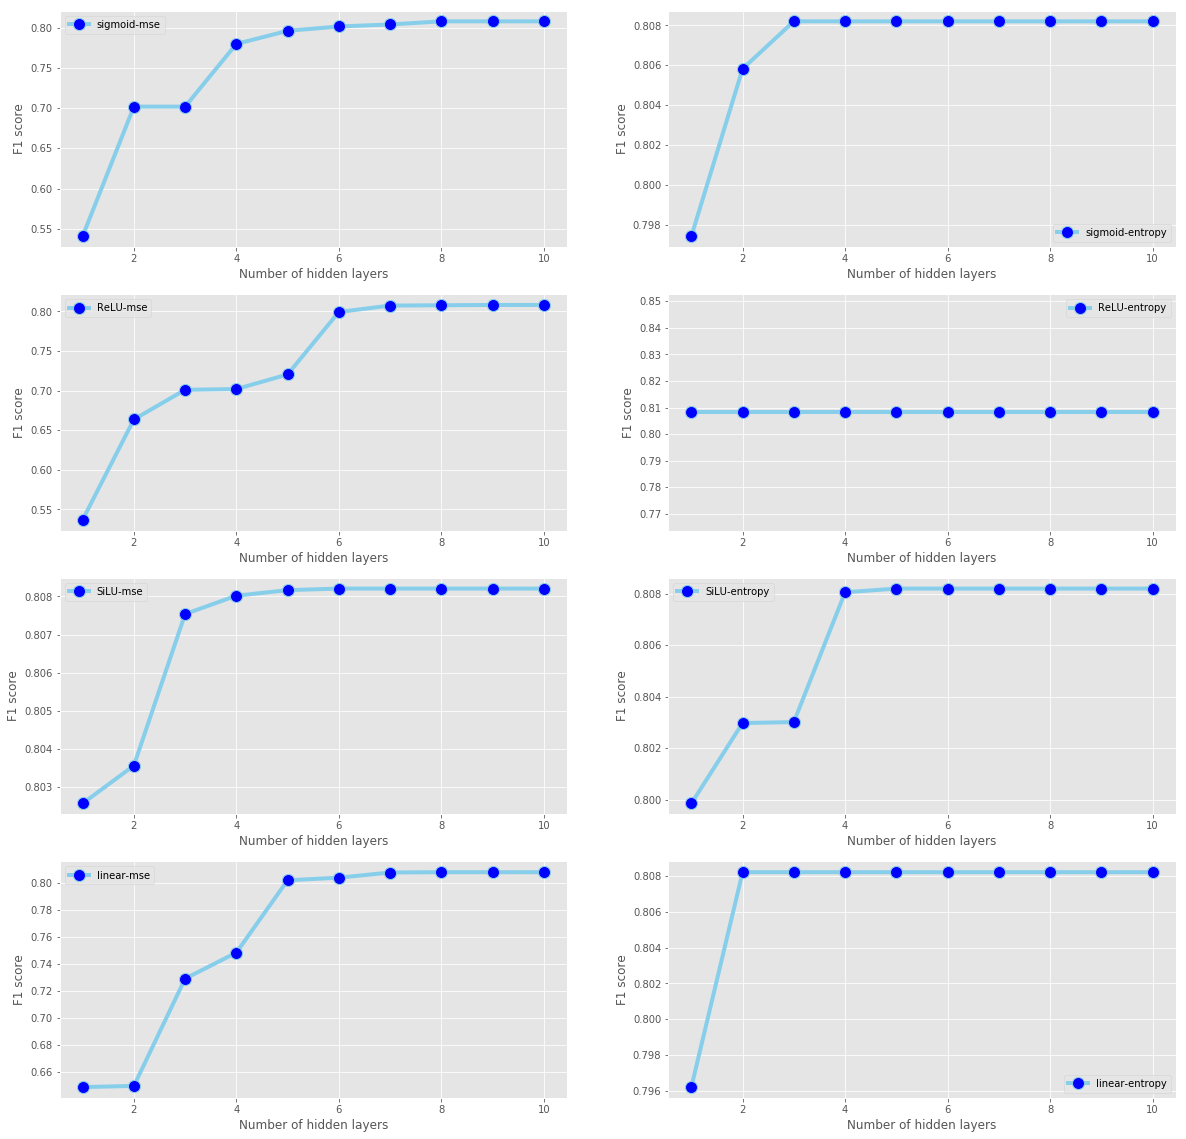

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
ourlegends = ['sigmoid-mse','sigmoid-entropy','ReLU-mse','ReLU-entropy','SiLU-mse','SiLU-entropy','linear-mse','linear-entropy']
plt.figure(figsize=(20,20))
for i in range(8):
    so = output[(10*i):(10*i+10),:]
    so.sort(axis=0)
    df=pd.DataFrame({'x': so[:,2], ourlegends[i]: so[:,5]})
    plt.subplot(4,2,(i+1))
    plt.plot( 'x', ourlegends[i], data=df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
    plt.xlabel('Number of hidden layers')
    plt.ylabel('F1 score')
    plt.legend()
plt.show()


According to provided plots 'ReLU' and 'entropy' are the best choices for activation function and cost function respectively (since there are consistent over different number of layeres for the f1-score). Let's see F1 score and standardard deviation of the F1 scores in a table.

In [32]:
import pickle
output = pickle.load( open('output5.pk1','rb') )
output = np.array(output)
output.shape
output_table = pd.DataFrame()
temp = []
for i in range(80):
    if output[i,0] == 3:
        if output[i,1] == 1:
            temp.append('ReLU')
output_table['Phi'] = temp
temp = []
for i in range(80):
    if output[i,0] == 3:
        if output[i,1] == 1:
            temp.append('entropy')
output_table['Cost'] = temp
temp = []
for i in range(80):
    if output[i,0]==3:
        if output[i,1] == 1:
            temp.append(output[i,2])
output_table['Number of hidden layers'] = temp
temp = []
for i in range(80):
    if output[i,0]==3:
        if output[i,1] == 1:
            temp.append(output[i,5])
output_table['Mean of F1 scores'] = temp
temp = []
for i in range(80):
    if output[i,0]==3:
        if output[i,1] == 1:
            temp.append(output[i,6])
output_table['Standard deviation of F1 scores'] = temp
output[:,7:17]#these are for each fold

output_table.sort_values(by='Number of hidden layers')

,Phi,Cost,Number of hidden layers,Mean of F1 scores,Standard deviation of F1 scores
6,ReLU,entropy,1.0,0.801807,0.002200
5,ReLU,entropy,2.0,0.796380,0.022978
3,ReLU,entropy,3.0,0.808206,0.000009
1,ReLU,entropy,4.0,0.808206,0.000009
0,ReLU,entropy,5.0,0.780096,0.084327
7,ReLU,entropy,6.0,0.808206,0.000009
8,ReLU,entropy,7.0,0.804347,0.011583
2,ReLU,entropy,8.0,0.702014,0.212395
4,ReLU,entropy,9.0,0.702010,0.212398
9,ReLU,entropy,10.0,0.540664,0.267543


Using 3 and 4 hidden layers will give use the highest mean of F1 score (with mean of 0.80206) with the smallest standard deviation (0.000009) of F1 scores around mean. Since both numbers of layers generate the same result, we decide to the 3 hidden layers is the best choice (since the 4th one is doing nothing => vanish gradient).

#### Therefore, the most optimal parameter is:

Activation function: ReLu 

Cost function: Cross Entropy

Number of hidden layer: 3

Grid searching hyper parameters of minibatch is done in ManeFrameII and we need to load it to draw curves.There is a graph for each set of activation functions and cost functions. X axis is number of hidden layers and Y axis is accuracy or F1 score. According to the the provided graphs the most optimal choice for the number of hidden layers is three. The accuracy and F1 score are not changing that much in our dataset because there are lots of zeros in the prediction. We have implemented all the methods and ways discussed in our class and we have a very good accuracy and F1 score.

<b> We did run our code over other data like digits data and iris data and our code is working wihtout any issue. In our data, outputs are highly imbalanced and most are zero, which causes most of the prediction to be zero even with stratified cross validation.
We have ran the same parameters with sklearn, it gave us the same results for 2 layers. For more than 2 layers, it starts to be different and we think this is because the vanishing gradient problem which is out of the scope of this lab.
We have tried our code with different data sets and compared to sklearn and our impelemntation looks like it's stable. We also see that the relu and silu are not very different from linear and sigmoid from the graphs, but when we tested it on other datasets it was different and tend to be better than sigmoid and linear</b>

## Visualization of weights

Let's see how weighting factors are being trained with the most optimal hyper parameters. Pattern of learning the weights is shown in these graphs. We have used mean value of weights to draw this graphs. We did run simulations of this part for 20 epochs because practically they converged in 20th epochs.

In [33]:
vals = { 'n_hidden':(50,50,50), 
                'C':0.1, 'epochs':20, 'eta':0.001, 
                 'alpha':0.001, 'decrease_const':1e-5, 'minibatches':50,
                 'shuffle':True,'random_state':1, 'phi' : 'ReLU'}
nn_quad = TLPMiniBatch(**vals)

vals = { 'n_hidden':(50,50,50), 
                'C':0.1, 'epochs':20, 'eta':0.001, 
                 'alpha':0.001, 'decrease_const':1e-5, 'minibatches':50,
                 'shuffle':True,'random_state':1, 'phi' : 'ReLU', 'cost':'entropy'}

nn_cross = TLPMiniBatch(**vals)

%time nn_cross.fit(X_train, y_train, print_progress=1)
%time nn_quad.fit(X_train, y_train, print_progress=1)
print("Done")

Epoch: 20/20

CPU times: user 5min 53s, sys: 6min 44s, total: 12min 37s
Wall time: 27.5 s


Epoch: 20/20

CPU times: user 6min 32s, sys: 7min 42s, total: 14min 14s
Wall time: 30.6 s
Done


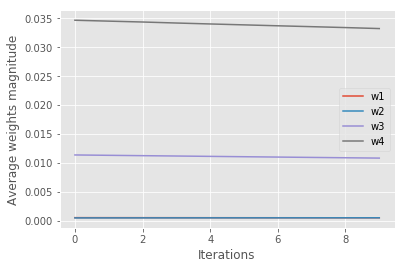

In [34]:
clf = nn_quad
#print (clf.grad_W[0])
ax = plt.subplot(1,1,1)

for i in range (len(clf.weight_W)):
    #print (abs(clf.grad_W[i][10:]))
    plt.plot(abs(clf.weight_W[i][10:]), label='w'+str(i+1))
plt.legend()
plt.ylabel('Average weights magnitude')
plt.xlabel('Iterations')
plt.show()

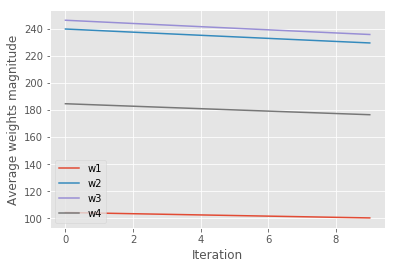

In [35]:
clf = nn_cross
#print (clf.grad_W[0])
ax = plt.subplot(1,1,1)

for i in range (len(clf.weight_W)):
    #print (abs(clf.grad_W[i][10:]))
    plt.plot(abs(clf.weight_W[i][10:]), label='w'+str(i+1))
plt.legend()
plt.ylabel('Average weights magnitude')
plt.xlabel('Iteration')
plt.show()

Another question we had in our minds was trying other classifiers and see how it works with our dataset.

In [155]:
svr.get_params().keys()

dict_keys(['C', 'cost', 'epochs', 'eta', 'n_hidden', 'phi', 'random_state'])

In [21]:
#now let's test on our dataset
#i already went up and over written X_test, X_train ... to  reflect our data
#you need to read the flight data before running this to reproduce the results
#TAKE CARE!! THIS TAKES LONG TIME TO RUN ...
from sklearn.ensemble import RandomForestClassifier as RFR
from sklearn.ensemble import GradientBoostingClassifier as GBR
from sklearn.metrics import f1_score
mods = [RFR(), GBR()]
[f1_score(y_test,mod.fit(X_train, y_train).predict(X_test), average = 'weighted') for mod in mods]

[0.6357357050829563, 0.5736496518938183]

In [23]:
#computing the accuracy
#TAKE CARE!! THIS TAKES LONG TIME TO RUN ...
from sklearn.metrics import accuracy_score
[accuracy_score(y_test,mod.fit(X_train, y_train).predict(X_test)) for mod in mods]

[0.6920105257264431, 0.6876434690106937]

As you see, using other methods like Random Forest Classifier and Gradient Boosting Classifier have less accuracy and f1-socre (it could because the way the train and test data splited. However, since it caused a whole lot of time to run it, we did not try the stratified CV to give a better comparision to our NN result)

# Conclusion

In this lab we used the Flights data set, we first started by providing a business case to our data set, and from the business case we identified the evaluation criteria that is most uselful, in our case it was the f1 score. After that we discussed different methods of dividing the data set, and at the end we decided to go with 10 fold stratified cross validation.
For our model, we created a custom implementation of the multi-layer preceptron where the user can define different activation functions(sigmoid, linear, relu, and silu). We tuned the hyper parameters to find the best parameters for our weighted f1 macro score. And we visualized the magnitude of the gradients.
It's noticed that we have the problem of the vanishing gradient where all the work is on the last layer and fixing this problem was out of the scope of this lab but we believe that's the reason that the f1 score plateaus after the first hidden layer. Looking at our dataset, we had an intuition that the data has alot of variability and we thought that an ensemble method would perform better so we used sklearn to compute the f1 score and both random forest and Boosting out performed MLP.
Leassons learned is Neural Networks are really powerful but in very specific kind of data sets(images, voice recognition, etc ...) for our dataset it is not the best classifier!
